# 1- Importation des librairies pour tester les différents modèles

In [ ]:
#pip install lazypredict

In [415]:
import numpy as np
import pandas as pd
import seaborn as sns
#from lazypredict.Supervised import LazyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier, BernoulliRBM
from sklearn.model_selection import learning_curve
from xgboost import XGBClassifier
from sklearn.svm import NuSVC
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import timeit, time
import os
import warnings
warnings.filterwarnings("ignore")

In [406]:
train = pd.read_csv('train_final.csv')

In [407]:
train.set_index('id', inplace = True)

In [408]:
train

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status,employment,savings_status,...,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,housing_for free,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident
id,,,,,,,,,,,,,,,,,,,,,
30,0.622518,2.010778,-1.754567,-0.727127,-0.437229,-0.698918,-0.432410,1,1,0,...,0,1,0,0,1,0,0,1,0,0
536,1.988249,1.031710,0.017446,-0.727127,-0.641078,1.075834,-0.432410,1,2,1,...,0,1,0,0,1,0,0,1,0,0
696,-1.312267,-0.132756,-0.868560,-0.727127,0.072394,-0.698918,-0.432410,2,2,1,...,0,1,0,0,1,0,0,1,0,0
558,-0.060347,-0.837685,0.903452,1.109417,0.174318,-0.698918,2.312621,2,4,1,...,1,0,0,0,1,0,0,1,0,0
837,-0.060347,-0.456057,0.903452,-0.727127,-1.048776,1.075834,-0.432410,0,2,1,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,1.305384,-0.203582,0.903452,1.109417,-1.150701,-0.698918,-0.432410,1,3,1,...,0,1,0,0,0,1,0,1,0,0
271,0.622518,-0.189834,0.903452,1.109417,0.072394,-0.698918,-0.432410,1,1,1,...,0,1,0,0,1,0,0,1,0,0
861,-0.629401,-0.457307,0.017446,-1.645399,-0.641078,1.075834,-0.432410,1,1,1,...,1,0,0,0,1,0,0,0,0,1


# 2- Determination de la target value et split du dataset

In [409]:
y= train['class']
del train['class']
X = train

In [410]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40)

In [411]:
X_train.shape

(568, 47)

In [412]:
y_train.shape

(568,)

In [413]:
X_test.shape

(143, 47)

In [414]:
y_test.shape

(143,)

# 3- Teste des diiférents algorithmes de façon native et visualisation des cas d'overfitting

In [435]:
log = LogisticRegression()
log.fit(X_train, y_train)
print('Train Score Regression Logistique:', log.score(X_train, y_train))
print('Test Score Regression Logistique:', log.score(X_test, y_test))

Train Score Regression Logistique: 0.7711267605633803
Test Score Regression Logistique: 0.6993006993006993


Train Score KNN: 0.7992957746478874
Test ScoreKNN: 0.7552447552447552
[ 45  90 136 181 227 272 317 363 408 454]


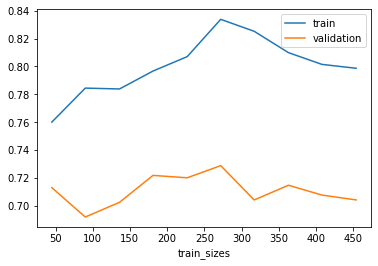

In [448]:
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
print('Train Score KNN:', kn.score(X_train, y_train))
print('Test ScoreKNN:', kn.score(X_test, y_test))

N, train_score, val_score = learning_curve(kn, X_train, y_train, train_sizes = np.linspace(0.1, 1.0, 10))
print(N)
plt.plot(N, train_score.mean(axis = 1), label = 'train')
plt.plot(N, val_score.mean(axis = 1), label = 'validation')
plt.xlabel('train_sizes')
plt.legend()


In [434]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
print('Train Score Naive Bayes:', nb.score(X_train, y_train))
print('Test Score Naive Bayes:', nb.score(X_test, y_test))


Train Score Naive Bayes: 0.7535211267605634
Test Score Naive Bayes: 0.6713286713286714


In [428]:
svc = SVC()
svc.fit(X_train, y_train)
print('Train Score SVC:', svc.score(X_train, y_train))
print('Test Score SVC:', svc.score(X_test, y_test))


Train Score SVC: 0.8063380281690141
Test Score SVC: 0.7342657342657343


Train Score random forest: 1.0
Test Score random forest: 0.7202797202797203
[ 45  90 136 181 227 272 317 363 408 454]


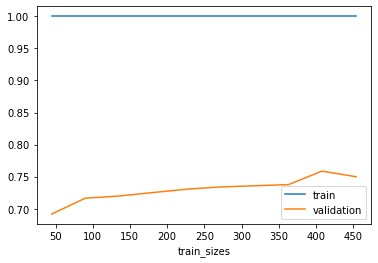

In [426]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print('Train Score random forest:', rf.score(X_train, y_train))
print('Test Score random forest:', rf.score(X_test, y_test))
N, train_score, val_score = learning_curve(rf, X_train, y_train, train_sizes = np.linspace(0.1, 1.0, 10))
print(N)
plt.plot(N, train_score.mean(axis = 1), label = 'train')
plt.plot(N, val_score.mean(axis = 1), label = 'validation')
plt.xlabel('train_sizes')
plt.legend()

Train Score XGBoost: 1.0
Test Score XGBoost : 0.7342657342657343
[ 45  90 136 181 227 272 317 363 408 454]


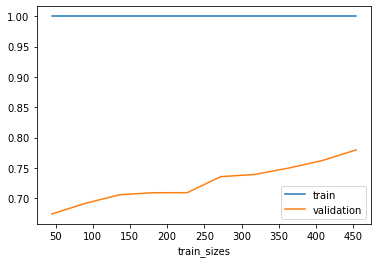

In [427]:
xb = XGBClassifier()
xb.fit(X_train, y_train)
print('Train Score XGBoost:', xb.score(X_train, y_train))
print('Test Score XGBoost :', xb.score(X_test, y_test))

N, train_score, val_score = learning_curve(xb, X_train, y_train, train_sizes = np.linspace(0.1, 1.0, 10))
print(N)
plt.plot(N, train_score.mean(axis = 1), label = 'train')
plt.plot(N, val_score.mean(axis = 1), label = 'validation')
plt.xlabel('train_sizes')
plt.legend()

L'overfitting est un phén

# 4- Application du GridSearch pour trouver les hyperparamètres optimaux pour les modèles 

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, auc, f1_score, recall_score,roc_auc_score, roc_curve


In [27]:
# Pour la RL

paramRL = {
    'penalty': ['l1','l2','elasticnet','none'],
    'C' : [0.01, 0.02, 0.03, 1, 1.01, 1.02, 2.01, 2.02],
    'solver': ['newton-cg','lbfgs','liblinear','sag','saga']
}

gridRL = GridSearchCV(LogisticRegression(), paramRL, cv = 5)
gridRL.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.02, 0.03, 1, 1.01, 1.02, 2.01, 2.02],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [135]:
gridRL.best_score_

0.7359416239714329

In [136]:
gridRL.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'saga'}

In [439]:
start = timeit.default_timer()

modelRL = gridRL.best_estimator_
modelRL.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print("train:",modelRL.score(X_train, y_train))
print("test:", modelRL.score(X_test, y_test))

Le temps dexecution est de :0.003186400019330904
train: 0.7711267605633803
test: 0.7132867132867133


In [97]:
RL = LogisticRegression(C = 1, penalty= 'l1', solver='saga')
RL.fit(X_train, y_train)
y_pred_RL = RL.predict(X_test)
print(accuracy_score(y_pred_RL, y_test))
print(confusion_matrix(y_test, y_pred_RL))
print(classification_report(y_test, y_pred_RL))

0.7132867132867133
[[15 22]
 [19 87]]
              precision    recall  f1-score   support

           0       0.44      0.41      0.42        37
           1       0.80      0.82      0.81       106

    accuracy                           0.71       143
   macro avg       0.62      0.61      0.62       143
weighted avg       0.71      0.71      0.71       143



# a- Pour le KNN

In [35]:
paramKNN = {'n_neighbors': np.arange(2, 33),
            'weights': ['uniform','distance'],
            'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
            'metric': ['euclidean','manhattan', 'minkowski']}
gridKNN = GridSearchCV(KNeighborsClassifier(), paramKNN, cv=5)
gridKNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
                         'weights': ['uniform', 'distance']})

In [397]:
gridKNN.best_score_

0.7412047818661699

In [398]:
gridKNN.best_params_

{'algorithm': 'ball_tree',
 'metric': 'euclidean',
 'n_neighbors': 28,
 'weights': 'distance'}

In [399]:
start = timeit.default_timer()

modelKNN = gridKNN.best_estimator_
modelKNN.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print("test:",modelKNN.score(X_test, y_test))
print("train:",modelKNN.score(X_train, y_train))


Le temps dexecution est de :0.013657399998919573
test: 0.7622377622377622
train: 1.0


0.7622377622377622
[[11 26]
 [ 8 98]]
              precision    recall  f1-score   support

           0       0.58      0.30      0.39        37
           1       0.79      0.92      0.85       106

    accuracy                           0.76       143
   macro avg       0.68      0.61      0.62       143
weighted avg       0.74      0.76      0.73       143



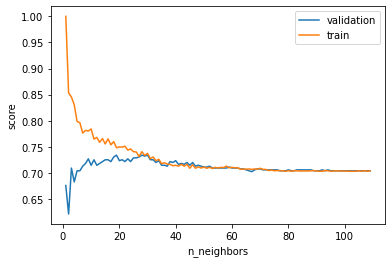

In [437]:
KNN = KNeighborsClassifier(algorithm= 'ball_tree',
 metric = 'euclidean',
 n_neighbors=  28,
 weights= 'distance')

KNN.fit(X_train, y_train)
y_pred_KNN = KNN.predict(X_test)
print(accuracy_score(y_pred_KNN, y_test))
print(confusion_matrix(y_test, y_pred_KNN))
print(classification_report(y_test, y_pred_KNN))

model = KNeighborsClassifier()
k = np.arange(1, 110)

train_score, val_score = validation_curve(model, X_train, y_train, 'n_neighbors',k,cv=5)
plt.plot(k, val_score.mean(axis = 1), label = 'validation')
plt.plot(k, train_score.mean(axis = 1), label = 'train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

# b- Pour Naive-Bayes

In [40]:
paramNB = {'alpha' : np.arange(1e-3, 13),
           
           }
gridNB = GridSearchCV(BernoulliNB(), paramNB, cv=5)
gridNB.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BernoulliNB(),
             param_grid={'alpha': array([1.0000e-03, 1.0010e+00, 2.0010e+00, 3.0010e+00, 4.0010e+00,
       5.0010e+00, 6.0010e+00, 7.0010e+00, 8.0010e+00, 9.0010e+00,
       1.0001e+01, 1.1001e+01, 1.2001e+01])})

In [46]:
gridNB.best_score_

0.7342648657040833

In [47]:
gridNB.best_params_

{'alpha': 11.000999999999998}

In [48]:
start = timeit.default_timer()

modelNB = gridNB.best_estimator_
modelNB.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print(modelNB.score(X_test, y_test))


Le temps dexecution est de :0.004497799999967356
0.7132867132867133


In [133]:
NB = BernoulliNB(alpha = 11.000999999999998)

NB.fit(X_train, y_train)
y_pred_NB = NB.predict(X_test)
print(accuracy_score(y_pred_NB, y_test))
print(confusion_matrix(y_test, y_pred_NB))
print(classification_report(y_test, y_pred_NB))

0.7132867132867133
[[12 25]
 [16 90]]
              precision    recall  f1-score   support

           0       0.43      0.32      0.37        37
           1       0.78      0.85      0.81       106

    accuracy                           0.71       143
   macro avg       0.61      0.59      0.59       143
weighted avg       0.69      0.71      0.70       143



## c- Pour SVC

In [45]:
from sklearn.svm import SVC
paramSVC = {'C' : np.arange(15, 23),
           'kernel' : ['linear', 'poly','rbf', 'sigmoid'],
            'gamma' : ['scale', 'auto'],
            'decision_function_shape': ['ovo', 'ovr']
           }
gridSVC = GridSearchCV(SVC(), paramSVC, cv=5)
gridSVC.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([15, 16, 17, 18, 19, 20, 21, 22]),
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [50]:
gridSVC.best_score_

0.764089427107592

In [51]:
gridSVC.best_params_

{'C': 17, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'rbf'}

In [52]:
start = timeit.default_timer()

modelSVC = gridSVC.best_estimator_
modelSVC.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print(modelSVC.score(X_test, y_test))


Le temps dexecution est de :0.006716600000117978
0.6923076923076923


In [53]:
SVC = SVC()

SVC.fit(X_train, y_train)
y_pred_SVC = SVC.predict(X_test)
print(accuracy_score(y_pred_SVC, y_test))
print(confusion_matrix(y_test, y_pred_SVC))
print(classification_report(y_test, y_pred_SVC))

0.7342657342657343
[[ 6 31]
 [ 7 99]]
              precision    recall  f1-score   support

           0       0.46      0.16      0.24        37
           1       0.76      0.93      0.84       106

    accuracy                           0.73       143
   macro avg       0.61      0.55      0.54       143
weighted avg       0.68      0.73      0.68       143



## d- Pour la foret aléatoire

In [64]:
from sklearn.ensemble import RandomForestClassifier

paramRF = {'n_estimators' : np.arange(37, 41),
           'criterion' : ['gini', 'entropy'],
            'max_depth' : np.arange(11, 16),  
            'max_features': ['auto', 'sqrt', 'log2']
           }
gridRF = GridSearchCV(RandomForestClassifier(), paramRF, cv=5)
gridRF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([11, 12, 13, 14, 15]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': array([37, 38, 39, 40])})

In [65]:
gridRF.best_score_

0.7729234590902034

In [66]:
gridRF.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'sqrt',
 'n_estimators': 37}

In [441]:
start = timeit.default_timer()

modelRF = gridRF.best_estimator_
modelRF.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print("train:",modelRF.score(X_train, y_train))
print("test:", modelRF.score(X_test, y_test))

Le temps dexecution est de :0.008783400000538677
train: 0.9929577464788732
test: 0.7342657342657343


0.6993006993006993
[[ 8 29]
 [14 92]]
              precision    recall  f1-score   support

           0       0.36      0.22      0.27        37
           1       0.76      0.87      0.81       106

    accuracy                           0.70       143
   macro avg       0.56      0.54      0.54       143
weighted avg       0.66      0.70      0.67       143



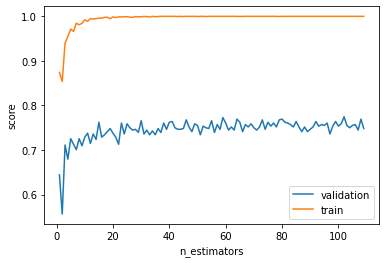

In [436]:
RF = RandomForestClassifier(criterion = 'entropy',
 max_depth = 12,
 max_features = 'sqrt',
 n_estimators = 37)

RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)
print(accuracy_score(y_pred_RF, y_test))
print(confusion_matrix(y_test, y_pred_RF))
print(classification_report(y_test, y_pred_RF))


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve

modelRF = RandomForestClassifier(n_estimators = 37)
k = np.arange(1, 110)

train_score, val_score = validation_curve(modelRF, X_train, y_train, 'n_estimators',k,cv=5)
plt.plot(k, val_score.mean(axis = 1), label = 'validation')
plt.plot(k, train_score.mean(axis = 1), label = 'train')

plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

## e- Pour le Bagging Classifier

In [71]:
from sklearn.ensemble import BaggingClassifier

paramBG = {
    'n_estimators' : np.arange(7, 15),
    'max_samples' : np.arange(0.01, 5),
    'max_features' : np.arange(0.01, 5),
    'verbose' : np.arange(1, 5)
}

gridBG = GridSearchCV(BaggingClassifier(), paramBG, cv = 5)
gridBG.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 7 for this parallel run (total 7)...
Building estimator 4 of 7 for this parallel run (total 7)...
Building estimator 5 of 7 for this parallel run (total 7)...
Building estimator 6 of 7 for this parallel run (total 7)...
Building estimator 7 of 7 for this parallel run (total 7)...
Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 7 for this parallel run (total 7)...
Building estimator 4 of 7 for this parallel run (total 7)...
Building estimator 5 of 7 for this parallel run (total 7)...
Building estimator 6 of 7 for this parallel run (total 7)...
Building estimator 7 of 7 for this parallel run (total 7)...
Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0


Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 7 for this parallel run (total 7)...
Building estimator 4 of 7 for this parallel run (total 7)...
Building estimator 5 of 7 for this parallel run (total 7)...
Building estimator 6 of 7 for this parallel run (total 7)...
Building estimator 7 of 7 for this parallel run (total 7)...
Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 7 for this parallel run (total 7)...
Building estimator 4 of 7 for this parallel run (total 7)...
Building estimator 5 of 7 for this parallel run (total 7)...
Building estimator 6 of 7 for this parallel run (total 7)...
Building estimator 7 of 7 for this parallel run (total 7)...
Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Building estimator 6 of 8 for this parallel run (total 8)...
Building estimator 7 of 8 for this parallel run (total 8)...
Building estimator 8 of 8 for this parallel run (total 8)...
Building estimator 1 of 8 for this parallel run (total 8)...
Building estimator 2 of 8 for this parallel run (total 8)...
Building estimator 3 of 8 for this parallel run (total 8)...
Building estimator 4 of 8 for this parallel run (total 8)...
Building estimator 5 of 8 for this parallel run (total 8)...
Building estimator 6 of 8 for this parallel run (total 8)...
Building estimator 7 of 8 for this parallel run (total 8)...
Building estimator 8 of 8 for this parallel run (total 8)...
Building estimator 1 of 8 for this parallel run (total 8)...
Building estimator 2 of 8 for this parallel run (total 8)...
Building estimator 3 of 8 for this parallel run (total 8)...
Building estimator 4 of 8 for this parallel run (total 8)...
Building estimator 5 of 8 for this parallel run (total 8)...
Building estimator 6 of 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 1 of 8 for this parallel run (total 8)...
Building estimator 2 of 8 for this parallel run (total 8)...
Building estimator 3 of 8 for this parallel run (total 8)...
Building estimator 4 of 8 for this parallel run (total 8)...
Building estimator 5 of 8 for this parallel run (total 8)...
Building estimator 6 of 8 for this parallel run (total 8)...
Building estimator 7 of 8 for this parallel run (total 8)...
Building estimator 8 of 8 for this parallel run (total 8)...
Building estimator 1 of 8 for this parallel run (total 8)...
Building estimator 2 of 8 for this parallel run (total 8)...
Building estimator 3 of 8 for this parallel run (total 8)...
Building estimator 4 of 8 for this parallel run (total 8)...
Building estimator 5 of 8 for this parallel run (total 8)...
Building estimator 6 of 8 for this parallel run (total 8)...
Building estimator 7 of 8 for this parallel run (total 8)...
Building estimator 8 of 8 for this parallel run (total 8)...
Building estimator 1 of 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Building estimator 1 of 9 for this parallel run (total 9)...
Building estimator 2 of 9 for this parallel run (total 9)...
Building estimator 3 of 9 for this parallel run (total 9)...
Building estimator 4 of 9 for this parallel run (total 9)...
Building estimator 5 of 9 for this parallel run (total 9)...
Building estimator 6 of 9 for this parallel run (total 9)...
Building estimator 7 of 9 for this parallel run (total 9)...
Building estimator 8 of 9 for this parallel run (total 9)...
Building estimator 9 of 9 for this parallel run (total 9)...
Building estimator 1 of 9 for this parallel run (total 9)...
Building estimator 2 of 9 for this parallel run (total 9)...
Building estimator 3 of 9 for this parallel run (total 9)...
Building estimator 4 of 9 for this parallel run (total 9)...
Building estimator 5 of 9 for this parallel run (total 9)...
Building estimator 6 of 9 for this parallel run (total 9)...
Building estimator 7 of 9 for this parallel run (total 9)...
Building estimator 8 of 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 1 of 9 for this parallel run (total 9)...
Building estimator 2 of 9 for this parallel run (total 9)...
Building estimator 3 of 9 for this parallel run (total 9)...
Building estimator 4 of 9 for this parallel run (total 9)...
Building estimator 5 of 9 for this parallel run (total 9)...
Building estimator 6 of 9 for this parallel run (total 9)...
Building estimator 7 of 9 for this parallel run (total 9)...
Building estimator 8 of 9 for this parallel run (total 9)...
Building estimator 9 of 9 for this parallel run (total 9)...
Building estimator 1 of 9 for this parallel run (total 9)...
Building estimator 2 of 9 for this parallel run (total 9)...
Building estimator 3 of 9 for this parallel run (total 9)...
Building estimator 4 of 9 for this parallel run (total 9)...
Building estimator 5 of 9 for this parallel run (total 9)...
Building estimator 6 of 9 for this parallel run (total 9)...
Building estimator 7 of 9 for this parallel run (total 9)...
Building estimator 8 of 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Paral

Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (tota

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0


Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
Building estimator 1 of 10 for this parallel run (to

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 1 of 11 for this parallel run (total 11)...
Building estimator 2 of 11 for this parallel run (total 11)...
Building estimator 3 of 11 for this parallel run (total 11)...
Building estimator 4 of 11 for this parallel run (total 11)...
Building estimator 5 of 11 for this parallel run (total 11)...
Building estimator 6 of 11 for this parallel run (total 11)...
Building estimator 7 of 11 for this parallel run (total 11)...
Building estimator 8 of 11 for this parallel run (total 11)...
Building estimator 9 of 11 for this parallel run (total 11)...
Building estimator 10 of 11 for this parallel run (total 11)...
Building estimator 11 of 11 for this parallel run (total 11)...
Building estimator 1 of 11 for this parallel run (total 11)...
Building estimator 2 of 11 for this parallel run (total 11)...
Building estimator 3 of 11 for this parallel run (total 11)...
Building estimator 4 of 11 for this parallel run (total 11)...
Building estimator 5 of 11 for this parallel run (tot

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Building estimator 7 of 11 for this parallel run (total 11)...
Building estimator 8 of 11 for this parallel run (total 11)...
Building estimator 9 of 11 for this parallel run (total 11)...
Building estimator 10 of 11 for this parallel run (total 11)...
Building estimator 11 of 11 for this parallel run (total 11)...
Building estimator 1 of 11 for this parallel run (total 11)...
Building estimator 2 of 11 for this parallel run (total 11)...
Building estimator 3 of 11 for this parallel run (total 11)...
Building estimator 4 of 11 for this parallel run (total 11)...
Building estimator 5 of 11 for this parallel run (total 11)...
Building estimator 6 of 11 for this parallel run (total 11)...
Building estimator 7 of 11 for this parallel run (total 11)...
Building estimator 8 of 11 for this parallel run (total 11)...
Building estimator 9 of 11 for this parallel run (total 11)...
Building estimator 10 of 11 for this parallel run (total 11)...
Building estimator 11 of 11 for this parallel run (t

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 7 of 11 for this parallel run (total 11)...
Building estimator 8 of 11 for this parallel run (total 11)...
Building estimator 9 of 11 for this parallel run (total 11)...
Building estimator 10 of 11 for this parallel run (total 11)...
Building estimator 11 of 11 for this parallel run (total 11)...
Building estimator 1 of 12 for this parallel run (total 12)...
Building estimator 2 of 12 for this parallel run (total 12)...
Building estimator 3 of 12 for this parallel run (total 12)...
Building estimator 4 of 12 for this parallel run (total 12)...
Building estimator 5 of 12 for this parallel run (total 12)...
Building estimator 6 of 12 for this parallel run (total 12)...
Building estimator 7 of 12 for this parallel run (total 12)...
Building estimator 8 of 12 for this parallel run (total 12)...
Building estimator 9 of 12 for this parallel run (total 12)...
Building estimator 10 of 12 for this parallel run (total 12)...
Building estimator 11 of 12 for this parallel run (t

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 10 of 12 for this parallel run (total 12)...
Building estimator 11 of 12 for this parallel run (total 12)...
Building estimator 12 of 12 for this parallel run (total 12)...
Building estimator 1 of 12 for this parallel run (total 12)...
Building estimator 2 of 12 for this parallel run (total 12)...
Building estimator 3 of 12 for this parallel run (total 12)...
Building estimator 4 of 12 for this parallel run (total 12)...
Building estimator 5 of 12 for this parallel run (total 12)...
Building estimator 6 of 12 for this parallel run (total 12)...
Building estimator 7 of 12 for this parallel run (total 12)...
Building estimator 8 of 12 for this parallel run (total 12)...
Building estimator 9 of 12 for this parallel run (total 12)...
Building estimator 10 of 12 for this parallel run (total 12)...
Building estimator 11 of 12 for this parallel run (total 12)...
Building estimator 12 of 12 for this parallel run (total 12)...
Building estimator 1 of 12 for this parallel run 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 7 of 12 for this parallel run (total 12)...
Building estimator 8 of 12 for this parallel run (total 12)...
Building estimator 9 of 12 for this parallel run (total 12)...
Building estimator 10 of 12 for this parallel run (total 12)...
Building estimator 11 of 12 for this parallel run (total 12)...
Building estimator 12 of 12 for this parallel run (total 12)...
Building estimator 1 of 12 for this parallel run (total 12)...
Building estimator 2 of 12 for this parallel run (total 12)...
Building estimator 3 of 12 for this parallel run (total 12)...
Building estimator 4 of 12 for this parallel run (total 12)...
Building estimator 5 of 12 for this parallel run (total 12)...
Building estimator 6 of 12 for this parallel run (total 12)...
Building estimator 7 of 12 for this parallel run (total 12)...
Building estimator 8 of 12 for this parallel run (total 12)...
Building estimator 9 of 12 for this parallel run (total 12)...
Building estimator 10 of 12 for this parallel run (t

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Paral

Building estimator 10 of 12 for this parallel run (total 12)...
Building estimator 11 of 12 for this parallel run (total 12)...
Building estimator 12 of 12 for this parallel run (total 12)...
Building estimator 1 of 13 for this parallel run (total 13)...
Building estimator 2 of 13 for this parallel run (total 13)...
Building estimator 3 of 13 for this parallel run (total 13)...
Building estimator 4 of 13 for this parallel run (total 13)...
Building estimator 5 of 13 for this parallel run (total 13)...
Building estimator 6 of 13 for this parallel run (total 13)...
Building estimator 7 of 13 for this parallel run (total 13)...
Building estimator 8 of 13 for this parallel run (total 13)...
Building estimator 9 of 13 for this parallel run (total 13)...
Building estimator 10 of 13 for this parallel run (total 13)...
Building estimator 11 of 13 for this parallel run (total 13)...
Building estimator 12 of 13 for this parallel run (total 13)...
Building estimator 13 of 13 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0


Building estimator 10 of 13 for this parallel run (total 13)...
Building estimator 11 of 13 for this parallel run (total 13)...
Building estimator 12 of 13 for this parallel run (total 13)...
Building estimator 13 of 13 for this parallel run (total 13)...
Building estimator 1 of 13 for this parallel run (total 13)...
Building estimator 2 of 13 for this parallel run (total 13)...
Building estimator 3 of 13 for this parallel run (total 13)...
Building estimator 4 of 13 for this parallel run (total 13)...
Building estimator 5 of 13 for this parallel run (total 13)...
Building estimator 6 of 13 for this parallel run (total 13)...
Building estimator 7 of 13 for this parallel run (total 13)...
Building estimator 8 of 13 for this parallel run (total 13)...
Building estimator 9 of 13 for this parallel run (total 13)...
Building estimator 10 of 13 for this parallel run (total 13)...
Building estimator 11 of 13 for this parallel run (total 13)...
Building estimator 12 of 13 for this parallel ru

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Building estimator 1 of 13 for this parallel run (total 13)...
Building estimator 2 of 13 for this parallel run (total 13)...
Building estimator 3 of 13 for this parallel run (total 13)...
Building estimator 4 of 13 for this parallel run (total 13)...
Building estimator 5 of 13 for this parallel run (total 13)...
Building estimator 6 of 13 for this parallel run (total 13)...
Building estimator 7 of 13 for this parallel run (total 13)...
Building estimator 8 of 13 for this parallel run (total 13)...
Building estimator 9 of 13 for this parallel run (total 13)...
Building estimator 10 of 13 for this parallel run (total 13)...
Building estimator 11 of 13 for this parallel run (total 13)...
Building estimator 12 of 13 for this parallel run (total 13)...
Building estimator 13 of 13 for this parallel run (total 13)...
Building estimator 1 of 13 for this parallel run (total 13)...
Building estimator 2 of 13 for this parallel run (total 13)...
Building estimator 3 of 13 for this parallel run (t

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0


Building estimator 4 of 13 for this parallel run (total 13)...
Building estimator 5 of 13 for this parallel run (total 13)...
Building estimator 6 of 13 for this parallel run (total 13)...
Building estimator 7 of 13 for this parallel run (total 13)...
Building estimator 8 of 13 for this parallel run (total 13)...
Building estimator 9 of 13 for this parallel run (total 13)...
Building estimator 10 of 13 for this parallel run (total 13)...
Building estimator 11 of 13 for this parallel run (total 13)...
Building estimator 12 of 13 for this parallel run (total 13)...
Building estimator 13 of 13 for this parallel run (total 13)...
Building estimator 1 of 13 for this parallel run (total 13)...
Building estimator 2 of 13 for this parallel run (total 13)...
Building estimator 3 of 13 for this parallel run (total 13)...
Building estimator 4 of 13 for this parallel run (total 13)...
Building estimator 5 of 13 for this parallel run (total 13)...
Building estimator 6 of 13 for this parallel run (

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Building estimator 1 of 14 for this parallel run (total 14)...
Building estimator 2 of 14 for this parallel run (total 14)...
Building estimator 3 of 14 for this parallel run (total 14)...
Building estimator 4 of 14 for this parallel run (total 14)...
Building estimator 5 of 14 for this parallel run (total 14)...
Building estimator 6 of 14 for this parallel run (total 14)...
Building estimator 7 of 14 for this parallel run (total 14)...
Building estimator 8 of 14 for this parallel run (total 14)...
Building estimator 9 of 14 for this parallel run (total 14)...
Building estimator 10 of 14 for this parallel run (total 14)...
Building estimator 11 of 14 for this parallel run (total 14)...
Building estimator 12 of 14 for this parallel run (total 14)...
Building estimator 13 of 14 for this parallel run (total 14)...
Building estimator 14 of 14 for this parallel run (total 14)...
Building estimator 1 of 14 for this parallel run (total 14)...
Building estimator 2 of 14 for this parallel run (

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 2 of 14 for this parallel run (total 14)...
Building estimator 3 of 14 for this parallel run (total 14)...
Building estimator 4 of 14 for this parallel run (total 14)...
Building estimator 5 of 14 for this parallel run (total 14)...
Building estimator 6 of 14 for this parallel run (total 14)...
Building estimator 7 of 14 for this parallel run (total 14)...
Building estimator 8 of 14 for this parallel run (total 14)...
Building estimator 9 of 14 for this parallel run (total 14)...
Building estimator 10 of 14 for this parallel run (total 14)...
Building estimator 11 of 14 for this parallel run (total 14)...
Building estimator 12 of 14 for this parallel run (total 14)...
Building estimator 13 of 14 for this parallel run (total 14)...
Building estimator 14 of 14 for this parallel run (total 14)...
Building estimator 1 of 14 for this parallel run (total 14)...
Building estimator 2 of 14 for this parallel run (total 14)...
Building estimator 3 of 14 for this parallel run (

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 1 of 14 for this parallel run (total 14)...
Building estimator 2 of 14 for this parallel run (total 14)...
Building estimator 3 of 14 for this parallel run (total 14)...
Building estimator 4 of 14 for this parallel run (total 14)...
Building estimator 5 of 14 for this parallel run (total 14)...
Building estimator 6 of 14 for this parallel run (total 14)...
Building estimator 7 of 14 for this parallel run (total 14)...
Building estimator 8 of 14 for this parallel run (total 14)...
Building estimator 9 of 14 for this parallel run (total 14)...
Building estimator 10 of 14 for this parallel run (total 14)...
Building estimator 11 of 14 for this parallel run (total 14)...
Building estimator 12 of 14 for this parallel run (total 14)...
Building estimator 13 of 14 for this parallel run (total 14)...
Building estimator 14 of 14 for this parallel run (total 14)...
Building estimator 1 of 14 for this parallel run (total 14)...
Building estimator 2 of 14 for this parallel run (

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 1 of 13 for this parallel run (total 13)...
Building estimator 2 of 13 for this parallel run (total 13)...
Building estimator 3 of 13 for this parallel run (total 13)...
Building estimator 4 of 13 for this parallel run (total 13)...
Building estimator 5 of 13 for this parallel run (total 13)...
Building estimator 6 of 13 for this parallel run (total 13)...
Building estimator 7 of 13 for this parallel run (total 13)...
Building estimator 8 of 13 for this parallel run (total 13)...
Building estimator 9 of 13 for this parallel run (total 13)...
Building estimator 10 of 13 for this parallel run (total 13)...
Building estimator 11 of 13 for this parallel run (total 13)...
Building estimator 12 of 13 for this parallel run (total 13)...
Building estimator 13 of 13 for this parallel run (total 13)...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'max_features': array([0.01, 1.01, 2.01, 3.01, 4.01]),
                         'max_samples': array([0.01, 1.01, 2.01, 3.01, 4.01]),
                         'n_estimators': array([ 7,  8,  9, 10, 11, 12, 13, 14]),
                         'verbose': array([1, 2, 3, 4])})

In [77]:
gridBG.best_score_

0.7060083837913368

In [78]:
gridBG.best_params_

{'max_features': 0.01, 'max_samples': 0.01, 'n_estimators': 13, 'verbose': 4}

In [79]:
start = timeit.default_timer()

modelBG = gridBG.best_estimator_
modelBG.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print(modelBG.score(X_test, y_test))


Le temps dexecution est de :0.007361900000205424
0.7412587412587412


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [389]:
BG = BaggingClassifier(base_estimator =KNeighborsClassifier(algorithm= 'ball_tree',
 metric = 'euclidean',
 n_neighbors=  30,
 weights= 'distance'),
n_estimators = 13)
BG.fit(X_train, y_train)
y_pred_BG = BG.predict(X_test)
print(accuracy_score(y_pred_BG, y_test))
print(confusion_matrix(y_test, y_pred_BG))
print(classification_report(y_test, y_pred_BG))

0.7762237762237763
[[ 10  27]
 [  5 101]]
              precision    recall  f1-score   support

           0       0.67      0.27      0.38        37
           1       0.79      0.95      0.86       106

    accuracy                           0.78       143
   macro avg       0.73      0.61      0.62       143
weighted avg       0.76      0.78      0.74       143



# f- Pour NuSVC

In [121]:
from sklearn.svm import NuSVC
paramNuSVC = {
           'kernel' : ['linear', 'poly','rbf', 'sigmoid'],
            'gamma' : ['scale', 'auto'],
            'decision_function_shape': ['ovo', 'ovr']
           }
gridNuSVC = GridSearchCV(NuSVC(), paramNuSVC, cv=5)
gridNuSVC.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=NuSVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [122]:
gridNuSVC.best_score_

0.7535320602390934

In [123]:
gridNuSVC.best_params_

{'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}

In [124]:
start = timeit.default_timer()

modelNuSVC = gridNuSVC.best_estimator_
modelNuSVC.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print(modelNuSVC.score(X_test, y_test))


Le temps dexecution est de :0.006938700000318931
0.7132867132867133


In [125]:
NuSVC = NuSVC(decision_function_shape ='ovo', gamma= 'scale', kernel= 'rbf')

NuSVC.fit(X_train, y_train)
y_pred_NuSVC = NuSVC.predict(X_test)
print(accuracy_score(y_pred_NuSVC, y_test))
print(confusion_matrix(y_test, y_pred_NuSVC))
print(classification_report(y_test, y_pred_NuSVC))

0.7132867132867133
[[12 25]
 [16 90]]
              precision    recall  f1-score   support

           0       0.43      0.32      0.37        37
           1       0.78      0.85      0.81       106

    accuracy                           0.71       143
   macro avg       0.61      0.59      0.59       143
weighted avg       0.69      0.71      0.70       143



# g- Pour XGBClassifier

In [87]:
from xgboost import XGBClassifier

paramXGB = { 
    'booster': ['gbtree','gblinear'],
    'eta' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2],
}
gridXGB = GridSearchCV(XGBClassifier(), paramXGB, cv=5)
gridXGB.fit(X_train, y_train)

[20:32:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:32:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:32:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:32:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[20:32:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:32:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:32:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:32:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[20:32:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:32:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:32:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:32:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [88]:
gridXGB.best_score_

0.7729234590902034

In [89]:
gridXGB.best_params_

{'booster': 'gbtree', 'eta': 0.08}

In [442]:
start = timeit.default_timer()

modelXGB = gridXGB.best_estimator_
modelXGB.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print("train:",modelXGB.score(X_train, y_train))
print("test:", modelXGB.score(X_test, y_test))


Le temps dexecution est de :0.13619170000310987
train: 0.9947183098591549
test: 0.7272727272727273


In [451]:
XGB = XGBClassifier()

XGB.fit(X_train, y_train)
y_pred_XGB = XGB.predict(X_test)
print(accuracy_score(y_pred_XGB, y_test))
print(confusion_matrix(y_test, y_pred_XGB))
print(classification_report(y_test, y_pred_XGB))

0.7342657342657343
[[15 22]
 [16 90]]
              precision    recall  f1-score   support

           0       0.48      0.41      0.44        37
           1       0.80      0.85      0.83       106

    accuracy                           0.73       143
   macro avg       0.64      0.63      0.63       143
weighted avg       0.72      0.73      0.73       143



## h- Pour AdaBoostClassifier

In [312]:
from sklearn.ensemble import AdaBoostClassifier

paramAda = { 
    'n_estimators': np.arange(85, 102),
    'algorithm' : ['SAMME', 'SAMME.R'],
    'random_state': np.arange(1, 10)
}
gridAda = GridSearchCV(AdaBoostClassifier(), paramAda, cv=5, scoring="accuracy")
gridAda.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': array([ 85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101]),
                         'random_state': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='accuracy')

In [98]:
gridAda.best_score_

0.744822232572582

In [99]:
gridAda.best_params_

{'algorithm': 'SAMME', 'n_estimators': 57, 'random_state': 1}

In [100]:
start = timeit.default_timer()

modelAda = gridAda.best_estimator_
modelAda.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print(modelAda.score(X_test, y_test))


Le temps dexecution est de :0.009172199999966324
0.6923076923076923


In [311]:
Ada = AdaBoostClassifier()

Ada.fit(X_train, y_train)
y_pred_Ada = Ada.predict(X_test)
print(accuracy_score(y_pred_Ada, y_test))
print(confusion_matrix(y_test, y_pred_Ada))
print(classification_report(y_test, y_pred_Ada))

0.7272727272727273
[[15 22]
 [17 89]]
              precision    recall  f1-score   support

           0       0.47      0.41      0.43        37
           1       0.80      0.84      0.82       106

    accuracy                           0.73       143
   macro avg       0.64      0.62      0.63       143
weighted avg       0.72      0.73      0.72       143



# 5- Comparatif des différents modèles et choix du meilleur modèle

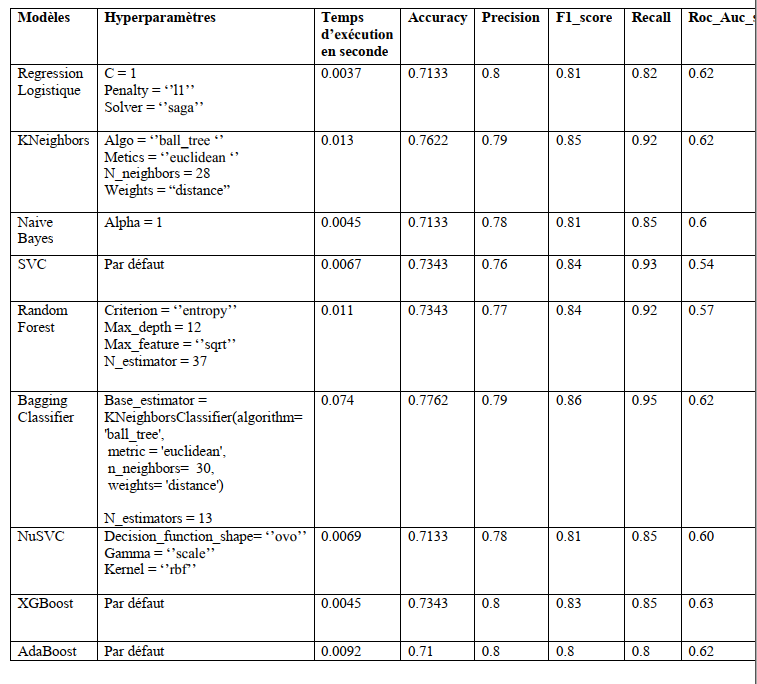

Après la visualisation de ce tableau comparatif, nous pouvons dire que le meilleur modèle est le le baggingclassifier appliqué au KNN car il a un meilleur accuracy score qui est de 0.7762 avec un temps d'exécution qui est de 0.074 secondes

# 6- Utilisation des méthodes d'ensemble

# a- Voting Classifier

In [194]:
from sklearn.ensemble import VotingClassifier

In [446]:
model_1 = KNeighborsClassifier(algorithm= 'ball_tree',
 metric = 'euclidean',
 n_neighbors=  28,
 weights= 'distance')

model_2 =  RandomForestClassifier(criterion = 'entropy',
 max_depth = 12,
 max_features = 'sqrt',
 n_estimators = 37)

model_3 = SVC()
model_4 = VotingClassifier([('KNN', model_1),
                            ('RandomForest', model_2),
                            ('SVC', model_3)],
                          voting = 'hard')

for model in (model_1, model_2, model_3, model_4):
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_test, y_test))

KNeighborsClassifier 0.7622377622377622
RandomForestClassifier 0.7202797202797203
SVC 0.7342657342657343
VotingClassifier 0.7692307692307693


# b- Bagging

In [443]:
model = BaggingClassifier(base_estimator =KNeighborsClassifier(algorithm= 'ball_tree',
 metric = 'euclidean',
 n_neighbors=  30,
 weights= 'distance'),
n_estimators = 13)

model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9929577464788732
0.7832167832167832


# c- Stacking

In [295]:
from sklearn.ensemble import StackingClassifier

In [447]:
model_4 = StackingClassifier([('KNN', model_1),
                            ('RandomForest', model_2),
                            ('SVC', model_3)],
                          final_estimator = KNeighborsClassifier(algorithm= 'ball_tree',
 metric = 'euclidean',
 n_neighbors=  28,
 weights= 'distance'))

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7482517482517482

In [402]:
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations = 15, verbosity = 2, population_size = 570, n_jobs = -1)
tpot.fit(X_train, y_train)


Generation 1 - Current best internal CV score: 0.7816953889147648

Generation 2 - Current best internal CV score: 0.7816953889147648

Generation 3 - Current best internal CV score: 0.7816953889147648

Generation 4 - Current best internal CV score: 0.7834342493401646

Generation 5 - Current best internal CV score: 0.7834342493401646

Generation 6 - Current best internal CV score: 0.7834342493401646

Generation 7 - Current best internal CV score: 0.783480825958702

Generation 8 - Current best internal CV score: 0.783480825958702

Generation 9 - Current best internal CV score: 0.7852662630026394

Generation 10 - Current best internal CV score: 0.7852662630026394

Generation 11 - Current best internal CV score: 0.7886974072349014

Generation 12 - Current best internal CV score: 0.7887439838534389

Generation 13 - Current best internal CV score: 0.792237230243751

Generation 14 - Current best internal CV score: 0.792237230243751

Generation 15 - Current best internal CV score: 0.7922372302

TPOTClassifier(generations=15, n_jobs=-1, population_size=570, verbosity=2)

In [403]:
tpot.fitted_pipeline_

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('stackingestimator',
                 StackingEstimator(estimator=GradientBoostingClassifier(learning_rate=0.5,
                                                                        max_depth=6,
                                                                        max_features=0.45,
                                                                        min_samples_leaf=10,
                                                                        min_samples_split=4))),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=0.2, min_samples_leaf=9,
                                        min_samples_split=18))])

In [404]:
tpot.score(X_test, y_test)

0.7342657342657343